## Deep Autoencoder


In [79]:
import tensorflow as tf
import numpy as np
import matplotlib

In [80]:
tf.__version__, np.__version__, matplotlib.__version__

('2.17.0', '1.26.4', '3.9.2')

In [81]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import InputLayer, Input, Dense

In [82]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [83]:
# 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
autoencoder = Sequential()

# encoder
autoencoder.add(InputLayer(shape=(784,)))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu'))

# decoder
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))

autoencoder.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0078 - loss: 0.3357 - val_accuracy: 0.0109 - val_loss: 0.1646
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0131 - loss: 0.1561 - val_accuracy: 0.0090 - val_loss: 0.1368
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0106 - loss: 0.1344 - val_accuracy: 0.0100 - val_loss: 0.1234
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0093 - loss: 0.1233 - val_accuracy: 0.0100 - val_loss: 0.1173
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0102 - loss: 0.1174 - val_accuracy: 0.0122 - val_loss: 0.1125
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0113 - loss: 0.1127 - val_accuracy: 0.0100 - val_loss: 0.1091
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0111 - loss: 0.1095 - val_accuracy: 0.0114 - val_loss: 0.1068
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0110 - loss: 0.1071 - val_accuracy: 0.

In [86]:
# 784 -> 128 -> 64 -> 32

or_dim = Input(shape=(784,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(or_dim, encoder_layer3(encoder_layer2(encoder_layer1(or_dim))))
encoder.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
encoded_imgs = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step


In [88]:
encoded_imgs.shape

(10000, 32)

In [89]:
decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step


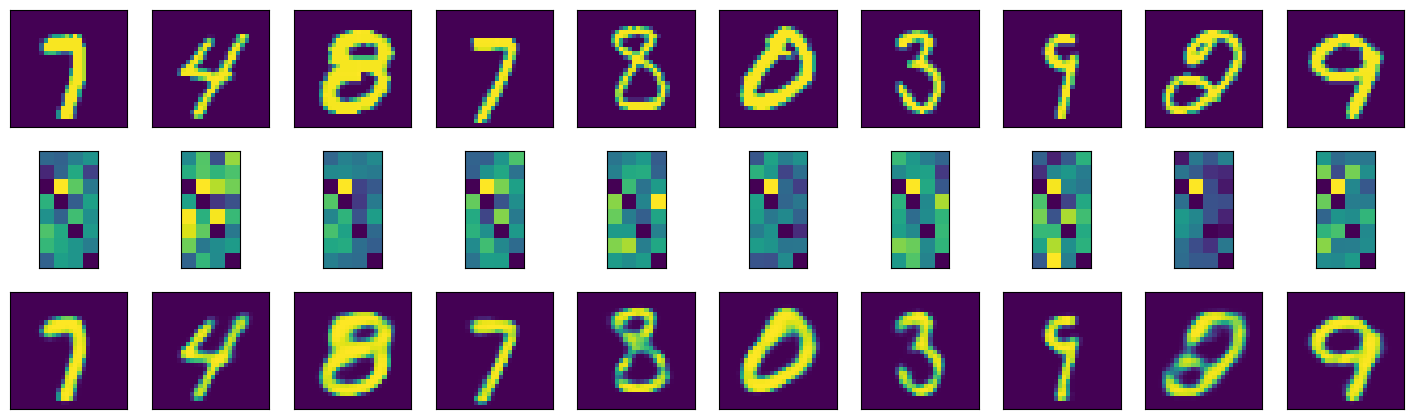

In [90]:
imgs_num = 10
test_imgs = np.random.randint(X_test.shape[0], size=imgs_num)
plt.figure(figsize=(18, 18))
for i, img_index in enumerate(test_imgs):
    # original images
    plt.subplot(10, 10, i+1)
    plt.imshow(X_test[img_index].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
    # encoded images
    plt.subplot(10, 10, i+1+imgs_num)
    plt.imshow(encoded_imgs[img_index].reshape(8, 4))
    plt.xticks(())
    plt.yticks(())
    # decoded images
    plt.subplot(10, 10, i+1+(imgs_num*2))
    plt.imshow(decoded_imgs[img_index].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())


